## Comparison of different kernels for LSTM-CNN
The purpose is to investigate which kernels (filter sizes) to pick for the final model (LSTM + Inception).

The following data are from training exercises of the following LSTM-CNN Model:

1. word embeddings (pretrained GloVe, frozen values)
2. bidirectional layer of 4 LSTM units
3. single convolutional layer, 24 filters (kernel varied)
4. fully connected layer (16 hidden units)
5. 4 class softmax output

Optimiser used is [AdaDelta](https://arxiv.org/abs/1212.5701). L2 regularisation and dropout were used to reduce over fitting. Every training run uses batch-size of 64 and runs for 50 epoch.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
%config InlineBackend.figure_format = 'retina'

In [2]:
def read_csv(file, acc, val_acc):
    with open(file, newline='') as f:
        reader = csv.reader(f)
        for i,row in enumerate(reader):
            if i > 0:
                acc.append(float(row[1]))
                #loss.append(float(row[2]))
                val_acc.append(float(row[3]))
                #val_loss.append(float(row[4]))

In [3]:
acc_1, acc_2, acc_3, acc_4, acc_5, acc_6, acc_7, acc_8, acc_9, acc_10, acc_11, acc_12 = [],[],[],[],[],[],[],[],[],[],[],[]
val_acc_1, val_acc_2, val_acc_3, val_acc_4, val_acc_5, val_acc_6, val_acc_7, val_acc_8, val_acc_9, val_acc_10, val_acc_11, val_acc_12 = [],[],[],[],[],[],[],[],[],[],[],[]
read_csv("history-1.csv", acc_1, val_acc_1)
read_csv("history-2.csv", acc_2, val_acc_2)
read_csv("history-3.csv", acc_3, val_acc_3)
read_csv("history-4.csv", acc_4, val_acc_4)
read_csv("history-5.csv", acc_5, val_acc_5)
read_csv("history-6.csv", acc_6, val_acc_6)
read_csv("history-7.csv", acc_7, val_acc_7)
read_csv("history-8.csv", acc_8, val_acc_8)
read_csv("history-9.csv", acc_9, val_acc_9)
read_csv("history-10.csv", acc_10, val_acc_10)
read_csv("history-11.csv", acc_11, val_acc_11)
read_csv("history-12.csv", acc_12, val_acc_12)

In [7]:
epoch = []
for i in range(0,30):
    epoch.append(i)

- Lowest validation loss: **kernel 7**
- However, kernel 7 starts to over fit mildly (probably significant after 50 epoch) before kernel 3 does.
- Kernel 5 is prone to over fitting. It has lower training loss than 3, but higher validation loss.
- Kernel 4 performs very similarly to 5.

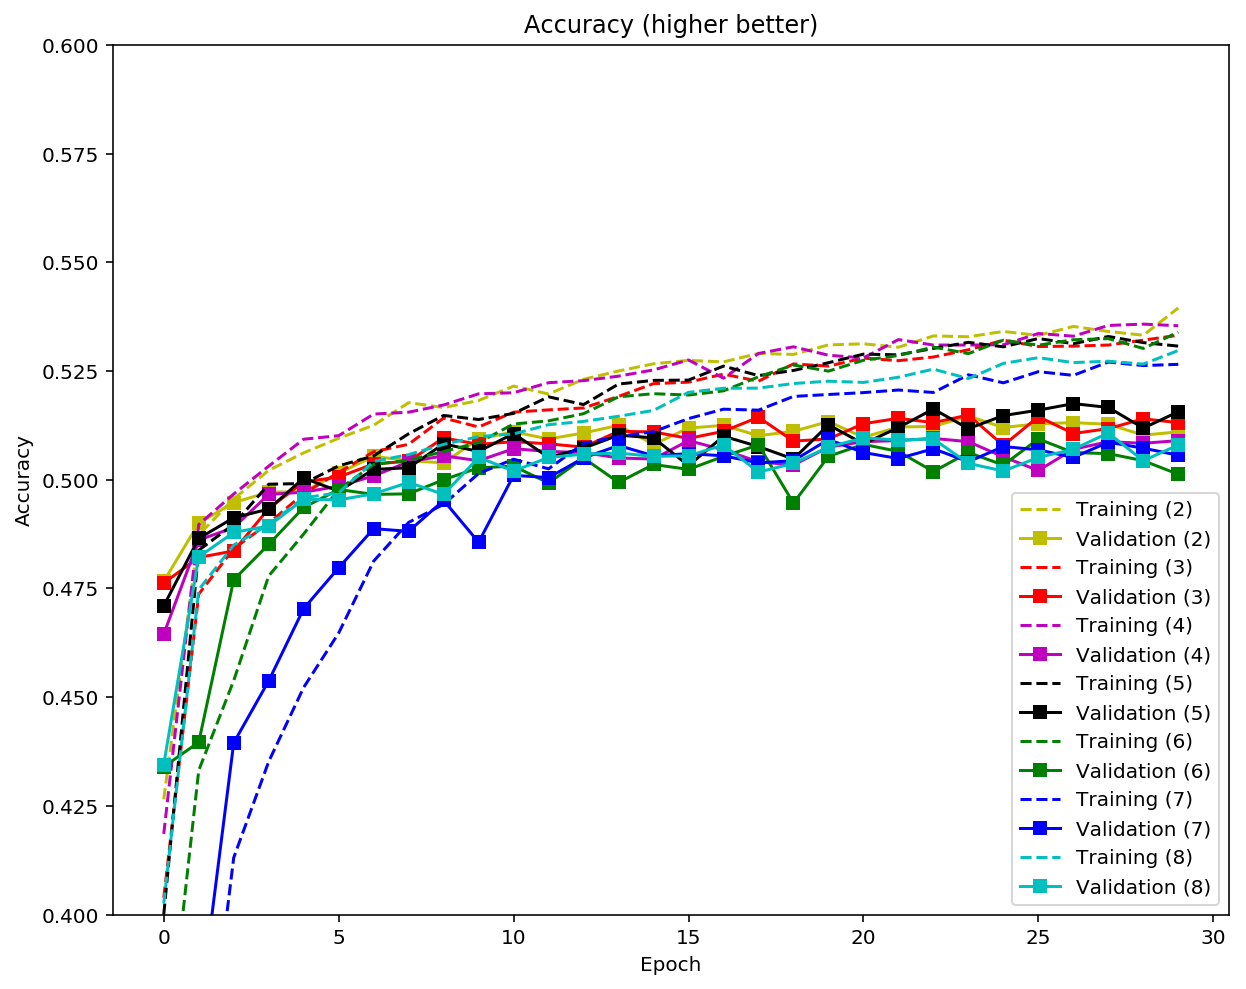

In [10]:
plt.figure(1, figsize=(10, 8))
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim( 0.4, 0.60 )
plt.title('Accuracy (higher better)')
plt.plot(epoch, acc_2, 'y--',label="Training (2)")
plt.plot(epoch, val_acc_2, 'ys-',label="Validation (2)")
plt.plot(epoch, acc_3, 'r--',label="Training (3)")
plt.plot(epoch, val_acc_3, 'rs-',label="Validation (3)")
plt.plot(epoch, acc_4, 'm--',label="Training (4)")
plt.plot(epoch, val_acc_4, 'ms-',label="Validation (4)")
plt.plot(epoch, acc_5, 'k--',label="Training (5)")
plt.plot(epoch, val_acc_5, 'ks-',label="Validation (5)")
plt.plot(epoch, acc_6, 'g--',label="Training (6)")
plt.plot(epoch, val_acc_6, 'gs-',label="Validation (6)")
plt.plot(epoch, acc_7, 'b--',label="Training (7)")
plt.plot(epoch, val_acc_7, 'bs-',label="Validation (7)")
plt.plot(epoch, acc_8, 'c--',label="Training (8)")
plt.plot(epoch, val_acc_8, 'cs-',label="Validation (8)")
#plt.hlines(0.6, 0, 50,linestyle = "--" , alpha = 0.2)
plt.legend(loc=4)
plt.show()

- **Kernel 7** has the highest validation accuracy. Kernel 6 follows very closely behind.
- In order of validation accuracy: 7 > 2 > 6 > 3 > 5/4/8.
- Slight advantage of kernel 3 over 5 in validation accuracy. It currently shows no sign of over fitting!
- Kernel 5 is prone to over fitting. It has higher training acc than 3 or 7, but lower validation acc.
- Performance of 4 and 5 are very similar, with very slight advantage to kernel 4.
- Kernel 8 over fits the most.

## Conclusion
What combination shall we use?

- Low number of kernel 5 and/or 4, with regularisation and dropout.
- Moderate number of kernel 3
- Moderate number of kernel 7, with regularisation. Although it seems to be most effective, it also presents the significant possibility of over fitting.

**Our overall aim is to exceed 60% validation accuracy.**